<a href="https://colab.research.google.com/github/theill95/Bachelor/blob/main/Bachelor_Data_Analysis_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/Bachelor_Data/Data.zip

Streaming af output blev afkortet til de sidste 5000 linjer.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  

In [ ]:
import os
import shutil

# Set the paths for your existing train, test, and validation folders
train_path = "/content/chest_xray/train"
test_path = "/content/chest_xray/test"
validation_path = "/content/chest_xray/val"

# Set the paths for your combined class folders
combined_normal_path = "/content/chest_xray/combined_NORMAL"
combined_pneumonia_path = "/content/chest_xray/combined_PNEUMONIA"

# Create combined class folders if they don't exist
os.makedirs(combined_normal_path, exist_ok=True)
os.makedirs(combined_pneumonia_path, exist_ok=True)

def combine_images(class_name, *source_paths, dest_path):
    for source_path in source_paths:
        source_class_path = os.path.join(source_path, class_name)
        images = os.listdir(source_class_path)
        
        for img_name in images:
            src_img_path = os.path.join(source_class_path, img_name)
            dst_img_path = os.path.join(dest_path, img_name)
            shutil.copy(src_img_path, dst_img_path)

# Combine NORMAL and PNEUMONIA images from train, test, and validation folders
combine_images("NORMAL", train_path, test_path, validation_path, dest_path=combined_normal_path)
combine_images("PNEUMONIA", train_path, test_path, validation_path, dest_path=combined_pneumonia_path)


In [ ]:
import os
import pandas as pd
import cv2

combined_normal_path = "/content/chest_xray/combined_NORMAL"
combined_pneumonia_path = "/content/chest_xray/combined_PNEUMONIA"

def get_image_files_and_labels(normal_path, pneumonia_path):
    normal_files = os.listdir(normal_path)
    pneumonia_files = os.listdir(pneumonia_path)
    
    normal_labels = [0] * len(normal_files)
    pneumonia_labels = [1] * len(pneumonia_files)
    
    image_files = normal_files + pneumonia_files
    labels = normal_labels + pneumonia_labels
    
    return image_files, labels

def convert_to_3_channels(normal_path, pneumonia_path):
    for folder in [normal_path, pneumonia_path]:
        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_3_channels = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            cv2.imwrite(img_path, img_3_channels)

image_files, labels = get_image_files_and_labels(combined_normal_path, combined_pneumonia_path)

# Convert grayscale images to 3-channel images
convert_to_3_channels(combined_normal_path, combined_pneumonia_path)

# Create a pandas DataFrame with the image filenames and labels
image_data = pd.DataFrame({'image_file': image_files, 'label': labels})


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(normal_path, pneumonia_path, test_output, validation_output, test_size=0.1, validation_size=0.1):
    normal_files = [os.path.join(normal_path, f) for f in os.listdir(normal_path)]
    pneumonia_files = [os.path.join(pneumonia_path, f) for f in os.listdir(pneumonia_path)]

    # Split into train/test sets
    normal_train, normal_test, _, _ = train_test_split(normal_files, [0]*len(normal_files), test_size=test_size, stratify=None, random_state=42)
    pneumonia_train, pneumonia_test, _, _ = train_test_split(pneumonia_files, [0]*len(pneumonia_files), test_size=test_size, stratify=None, random_state=42)

    # Split the remaining train set into train/validation sets
    normal_train, normal_val, _, _ = train_test_split(normal_train, [0]*len(normal_train), test_size=validation_size/(1-test_size), stratify=None, random_state=42)
    pneumonia_train, pneumonia_val, _, _ = train_test_split(pneumonia_train, [0]*len(pneumonia_train), test_size=validation_size/(1-test_size), stratify=None, random_state=42)

    # Save test data to the new directories
    for f in normal_test:
        shutil.copy(f, os.path.join(test_output, 'normal'))
    for f in pneumonia_test:
        shutil.copy(f, os.path.join(test_output, 'pneumonia'))

    # Save validation data to the new directories
    for f in normal_val:
        shutil.copy(f, os.path.join(validation_output, 'normal'))
    for f in pneumonia_val:
        shutil.copy(f, os.path.join(validation_output, 'pneumonia'))

# Define the input paths and output directories
normal_path = '/content/chest_xray/combined_NORMAL'
pneumonia_path = '/content/chest_xray/combined_PNEUMONIA'
test_output = '/content/chest_xray/test_new'
validation_output = '/content/chest_xray/val_new'

# Create output directories if they don't exist
os.makedirs(os.path.join(test_output, 'normal'), exist_ok=True)
os.makedirs(os.path.join(test_output, 'pneumonia'), exist_ok=True)
os.makedirs(os.path.join(validation_output, 'normal'), exist_ok=True)
os.makedirs(os.path.join(validation_output, 'pneumonia'), exist_ok=True)

# Perform the data split
split_data(normal_path, pneumonia_path, test_output, validation_output)


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the paths for your combined class folders
combined_class_1_path = "/content/chest_xray/combined_NORMAL"
combined_class_2_path = "/content/chest_xray/combined_PNEUMONIA"
output_folder = "/content/Bachelor_Data/Outputs"

def get_random_image_path(class_path):
    images = os.listdir(class_path)
    random_img_name = random.choice(images)
    return os.path.join(class_path, random_img_name)

def display_and_save_example_images(class1_path, class2_path, output_folder):
    # Load random images from each class
    img1_path = get_random_image_path(class1_path)
    img2_path = get_random_image_path(class2_path)
    
    img1 = Image.open(img1_path)
    img2 = Image.open(img2_path)
    
    # Resize images to the same size
    max_size = max(img1.size[0], img1.size[1], img2.size[0], img2.size[1])
    target_size = (max_size, max_size)
    img1_resized = img1.resize(target_size, Image.ANTIALIAS)
    img2_resized = img2.resize(target_size, Image.ANTIALIAS)
    
    # Display images
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img1_resized, cmap='gray')
    axes[0].set_title("NORMAL")
    axes[0].axis("off")
    
    axes[1].imshow(img2_resized, cmap='gray')
    axes[1].set_title("PNEUMONIA")
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()

    # Save combined image to output folder
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "combined_image.png")
    fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Display and save the example images
display_and_save_example_images(combined_class_1_path, combined_class_2_path, output_folder)


In [ ]:
# Set the paths for your combined class folders
combined_normal_path = "/content/chest_xray/combined_NORMAL"
combined_pneumonia_path = "/content/chest_xray/combined_PNEUMONIA"

# Count the number of images in each class
normal_count = len(os.listdir(combined_normal_path))
pneumonia_count = len(os.listdir(combined_pneumonia_path))
total_count = normal_count + pneumonia_count

# Calculate percentages
normal_percentage = (normal_count / total_count) * 100
pneumonia_percentage = (pneumonia_count / total_count) * 100

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Use the specified RGB colors
class1_color = (6 / 255, 57 / 255, 112 / 255)
class2_color = (30 / 255, 129 / 255, 176 / 255)

bar_width = 0.4
bar_positions = [0.5, 0.95]
bar_labels = ['Normal', 'Pneumonia']

ax.bar(bar_positions, [normal_count, pneumonia_count], color=[class1_color, class2_color], width=bar_width)
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels)
ax.set_ylabel('Number of Images')


# Add percentage labels above each bar
label_offset = 30
for i, percentage in enumerate([normal_percentage, pneumonia_percentage]):
    ax.text(bar_positions[i], (normal_count if i == 0 else pneumonia_count) + label_offset, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.tight_layout()

# Save the chart to the output folder
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, "bar_chart.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()



In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Set the paths for your combined class folders
combined_normal_path = "/content/chest_xray/combined_NORMAL"
combined_pneumonia_path = "/content/chest_xray/combined_PNEUMONIA"

# Set the output folders for the augmented images
augmented_normal_path = "/content/chest_xray/aug_norm"
augmented_pneumonia_path = "/content/chest_xray/aug_pneu"

# Create the output folders if they don't exist
os.makedirs(augmented_normal_path, exist_ok=True)
os.makedirs(augmented_pneumonia_path, exist_ok=True)

# Define the data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

def copy_original_images(input_path, output_path):
    for img_file in os.listdir(input_path):
        src = os.path.join(input_path, img_file)
        dst = os.path.join(output_path, img_file)
        shutil.copyfile(src, dst)

# Copy the original images to the augmented folders
copy_original_images(combined_normal_path, augmented_normal_path)
copy_original_images(combined_pneumonia_path, augmented_pneumonia_path)

def augment_images(input_path, output_path, target_count):
    image_files = os.listdir(input_path)
    current_count = len(image_files)
    index = 0

    while current_count < target_count:
        img_path = os.path.join(input_path, image_files[index % len(image_files)])
        img_basename = os.path.basename(img_path)
        img_prefix, img_ext = os.path.splitext(img_basename)

        # Load the image
        image = load_img(img_path)
        image_array = img_to_array(image)

        # Generate an augmented image
        transformed_image = datagen.random_transform(image_array)
        
        # Save the augmented image
        new_img_name = f"{img_prefix}_aug{current_count}{img_ext}"
        new_img_path = os.path.join(output_path, new_img_name)
        save_img(new_img_path, transformed_image)

        current_count += 1
        index += 1

# Augment and balance the images for each class
augment_images(combined_normal_path, augmented_normal_path, 10000)
augment_images(combined_pneumonia_path, augmented_pneumonia_path, 10000)




In [ ]:
import os

folder_path = '/content/Bachelor_Data/aug_norm'
num_files = len(os.listdir(folder_path))

print(f"The number of files in the folder {folder_path} is: {num_files}")

The number of files in the folder /content/Bachelor_Data/aug_norm is: 10000


In [ ]:
import os

folder_path = '/content/Bachelor_Data/aug_pneu'
num_files = len(os.listdir(folder_path))

print(f"The number of files in the folder {folder_path} is: {num_files}")

The number of files in the folder /content/Bachelor_Data/aug_pneu is: 10000


In [ ]:
import os
from IPython.display import display
from tensorflow.keras.preprocessing.image import load_img

# Set the paths for the augmented class folders
augmented_normal_path = "/content/Bachelor_Data/aug_norm"
augmented_pneumonia_path = "/content/Bachelor_Data/aug_pneu"

def find_augmented_image(path):
    for img_file in os.listdir(path):
        if "_aug" in img_file:
            return os.path.join(path, img_file)
    return None

# Find a sample augmented image for each class
sample_normal_image_path = find_augmented_image(augmented_normal_path)
sample_pneumonia_image_path = find_augmented_image(augmented_pneumonia_path)

if sample_normal_image_path:
    print("Sample augmented normal image:")
    display(load_img(sample_normal_image_path))
else:
    print("No augmented normal image found.")

if sample_pneumonia_image_path:
    print("Sample augmented pneumonia image:")
    display(load_img(sample_pneumonia_image_path))
else:
    print("No augmented pneumonia image found.")


In [ ]:
import os
from PIL import Image

def resize_images(input_path, output_path, target_size):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for img_name in os.listdir(input_path):
        img_path = os.path.join(input_path, img_name)
        img = Image.open(img_path)
        
        # Calculate the aspect ratio and resize the image while maintaining the aspect ratio
        aspect_ratio = float(img.width) / float(img.height)
        new_width = target_size
        new_height = int(new_width / aspect_ratio)
        
        if new_height > new_width:
            new_height = target_size
            new_width = int(new_height * aspect_ratio)
        
        img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)
        
        # Create a new image with the target size and paste the resized image into it
        new_img = Image.new("L", (target_size, target_size))
        new_img.paste(img_resized, ((target_size - new_width) // 2, (target_size - new_height) // 2))

        # Save the resized image to the output folder
        new_img.save(os.path.join(output_path, img_name))

input_folder_normal = "/content/chest_xray/aug_norm"
output_folder_normal = "/content/chest_xray/aug_norm_resize"
input_folder_pneumonia = "/content/chest_xray/aug_pneu"
output_folder_pneumonia = "/content/chest_xray/aug_pneu_resize"

resize_images(input_folder_normal, output_folder_normal, 200)
resize_images(input_folder_pneumonia, output_folder_pneumonia, 200)

In [ ]:
import os
from PIL import Image
import numpy as np

def normalize_image(img):
    img_array = np.array(img)
    img_array = img_array / 255.0
    return Image.fromarray((img_array * 255).astype(np.uint8))

def process_images(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for img_name in os.listdir(input_path):
        img_path = os.path.join(input_path, img_name)
        img = Image.open(img_path)

        # Normalize the pixel values
        normalized_img = normalize_image(img)

        # Save the normalized image to the output folder
        normalized_img.save(os.path.join(output_path, img_name))

input_folder_normal = "/content/chest_xray/aug_norm_resize"
output_folder_normal_normalized = "/content/chest_xray/aug_norm_resize_normalized"
input_folder_pneumonia = "/content/chest_xray/aug_pneu_resize"
output_folder_pneumonia_normalized = "/content/chest_xray/aug_pneu_resize_normalized"

process_images(input_folder_normal, output_folder_normal_normalized)
process_images(input_folder_pneumonia, output_folder_pneumonia_normalized)



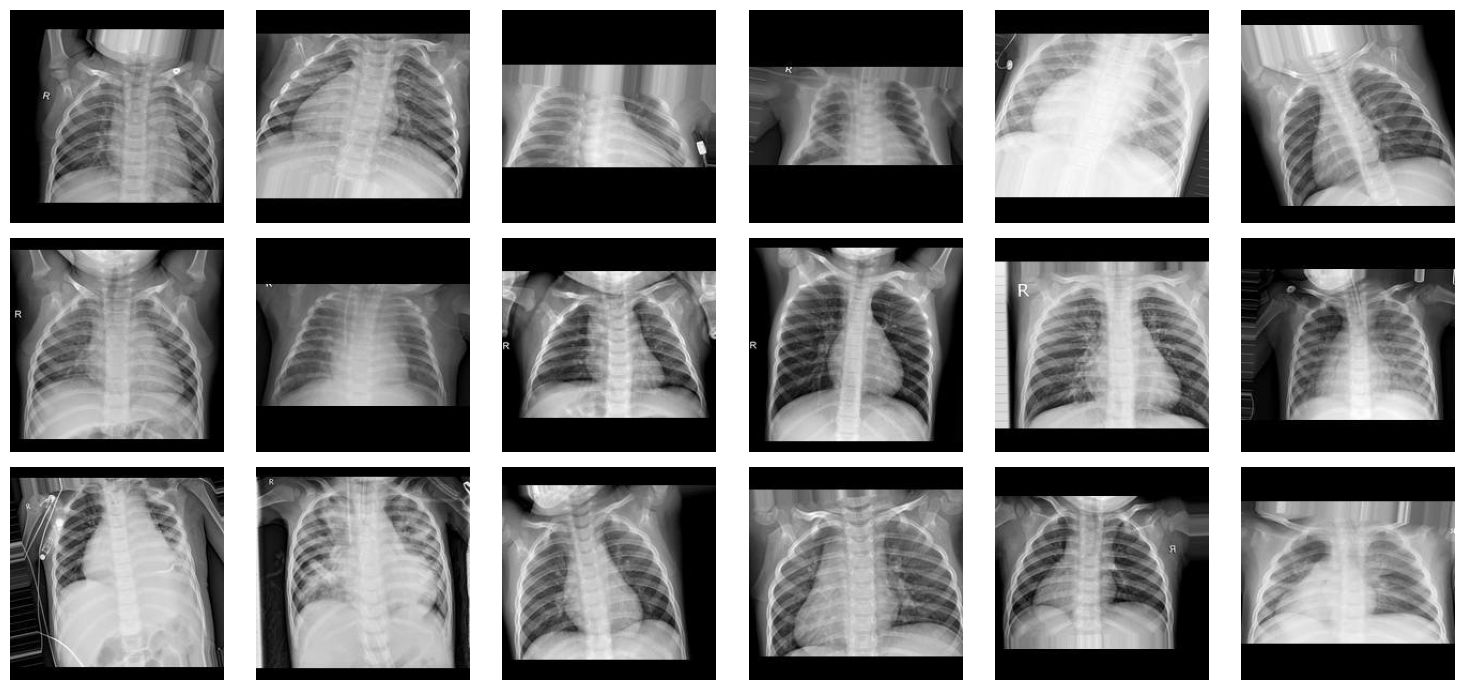

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_random_images(folder_path, num_images):
    image_names = os.listdir(folder_path)
    random_image_names = random.sample(image_names, num_images)
    
    images = []
    for img_name in random_image_names:
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        images.append(img)
        
    return images

def plot_images(images, rows, cols, output_folder, output_filename):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 7))
    axes = axes.ravel()

    for i, img in enumerate(images):
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')

    plt.tight_layout()

    # Save the image grid to the output folder
    output_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_path, dpi=300)
    plt.show()

input_folder_normal = "/content/chest_xray/aug_norm_resize_normalized"
input_folder_pneumonia = "/content/chest_xray/aug_pneu_resize_normalized"

num_images_per_row = 3
rows = 3
cols = 6

combined_images = []
for _ in range(rows):
    normal_images = load_random_images(input_folder_normal, num_images_per_row)
    pneumonia_images = load_random_images(input_folder_pneumonia, num_images_per_row)
    row_images = normal_images + pneumonia_images
    random.shuffle(row_images)
    combined_images.extend(row_images)

output_folder = "/content/Bachelor_Data/Outputs"
output_filename = "image_grid.png"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

plot_images(combined_images, rows, cols, output_folder, output_filename)




In [ ]:
import os
import shutil
from zipfile import ZipFile

def combine_folders(normal_path, pneumonia_path, combined_path):
    os.makedirs(combined_path, exist_ok=True)

    for f in os.listdir(normal_path):
        shutil.copy(os.path.join(normal_path, f), combined_path)

    for f in os.listdir(pneumonia_path):
        shutil.copy(os.path.join(pneumonia_path, f), combined_path)

def zip_folder(folder_path, zip_path):
    with ZipFile(zip_path, 'w') as zipf:
        for root, dirs, files in os.walk(folder_path):
            for f in files:
                zipf.write(os.path.join(root, f), os.path.relpath(os.path.join(root, f), folder_path))

normal_path = "/content/chest_xray/aug_norm_resize_normalized"
pneumonia_path = "/content/chest_xray/aug_pneu_resize_normalized"
combined_path = "/content/chest_xray/aug_combine_resize_normalized"
zip_path = "/content/chest_xray/aug_combine_final.zip"

combine_folders(normal_path, pneumonia_path, combined_path)
zip_folder(combined_path, zip_path)



In [ ]:
import os
import pandas as pd

def create_dataframe(normal_path, pneumonia_path):
    normal_files = [os.path.join(normal_path, f) for f in os.listdir(normal_path)]
    pneumonia_files = [os.path.join(pneumonia_path, f) for f in os.listdir(pneumonia_path)]

    normal_labels = [0] * len(normal_files)
    pneumonia_labels = [1] * len(pneumonia_files)

    all_files = normal_files + pneumonia_files
    all_labels = normal_labels + pneumonia_labels

    df = pd.DataFrame({'path': all_files, 'label': all_labels})
    return df

normal_path = "/content/chest_xray/aug_norm_resize_normalized"
pneumonia_path = "/content/chest_xray/aug_pneu_resize_normalized"

df = create_dataframe(normal_path, pneumonia_path)
print(df.head())


                                                path  label
0  /content/chest_xray/aug_norm_resize_normalized...      0
1  /content/chest_xray/aug_norm_resize_normalized...      0
2  /content/chest_xray/aug_norm_resize_normalized...      0
3  /content/chest_xray/aug_norm_resize_normalized...      0
4  /content/chest_xray/aug_norm_resize_normalized...      0


In [ ]:
import os
from PIL import Image, ImageOps
import numpy as np

def resize_and_normalize_image(input_path, output_path, size=(200, 200)):
    img = Image.open(input_path)
    img_resized = ImageOps.fit(img, size, Image.ANTIALIAS)
    img_array = np.array(img_resized) / 255.0
    img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
    img_normalized.save(output_path)

input_folders = ["/content/chest_xray/val_new/normal", "/content/chest_xray/val_new/pneumonia", "/content/chest_xray/test_new/normal", "/content/chest_xray/test_new/pneumonia"]
output_folders = ["/content/chest_xray/val_processed/normal", "/content/chest_xray/val_processed/pneumonia", "/content/chest_xray/test_processed/normal", "/content/chest_xray/test_processed/pneumonia"]

# Create output folders if they don't exist
for folder in output_folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

for input_folder, output_folder in zip(input_folders, output_folders):
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        resize_and_normalize_image(input_path, output_path)


In [ ]:
import os
import shutil
from zipfile import ZipFile

input_folders = {
    "validation": {
        "normal": "/content/chest_xray/val_processed/normal",
        "pneumonia": "/content/chest_xray/val_processed/pneumonia"
    },
    "test": {
        "normal": "/content/chest_xray/test_processed/normal",
        "pneumonia": "/content/chest_xray/test_processed/pneumonia"
    }
}

combined_folder = "/content/chest_xray/valtest"

# Create the combined folder if it doesn't exist
if not os.path.exists(combined_folder):
    os.makedirs(combined_folder)

# Copy subfolders to the combined folder
for set_name, set_folders in input_folders.items():
    set_path = os.path.join(combined_folder, set_name)
    
    if not os.path.exists(set_path):
        os.makedirs(set_path)
    
    for label, folder in set_folders.items():
        folder_name = os.path.basename(folder)
        destination_folder = os.path.join(set_path, folder_name)
        
        if not os.path.exists(destination_folder):
            shutil.copytree(folder, destination_folder)

# Zip the combined folder
zip_file = "testval.zip"
with ZipFile(zip_file, 'w') as zipf:
    for root, dirs, files in os.walk(combined_folder):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, combined_folder)
            zipf.write(file_path, arcname)

print("Zipped folder created:", zip_file)



Zipped folder created: testval.zip
